# World Military Powers Clustering Project
-World military power
Source : globalfirepower.com on 1st may 2020

- https://data.world/vizzup/world-military-power/workspace/file?filename=World+military+power.xlsx


## 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
from scipy.stats.mstats import winsorize

import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

%matplotlib inline
# %matplotlib notebook

plt.rcParams["figure.figsize"] = (10,6)
# plt.rcParams['figure.dpi'] = 100

sns.set_style("darkgrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 150

In [2]:
df = pd.read_excel('world_military_power.xlsx')

In [3]:
df.head()

,2020 ranking,Unnamed: 1,Airforce Strength,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Land Strength,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Navy Strength,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Finances,Unnamed: 37,Unnamed: 38,Unnamed: 39,Logistics,Unnamed: 41,Natural resources,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Manpower,Unnamed: 49,Unnamed: 50,Unnamed: 51,Geography,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59
0,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet,Trainer Aircraft Fleet value,Helicopter Fleet Strength,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength,Attack Helicopter Fleet Strength value,Tank Strength,Tank Strength value,AFV/APC Strength,AFV/APC Strength value,Self-Propelled Artillery Strength,Self-Propelled Artillery Strength value,Towed Artillery Strength,Towed Artillery Strength value,Rocket Projector Strength,Rocket Projector Strength value,Navy Fleet Strengths,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength,Submarine Fleet Strength value,Destroyer Fleet Strength,Destroyer Fleet Strength value,Frigate Fleet Strength,Frigate Fleet Strength value,defense spending budget,defense spending budget value,External Debt,External Debt value,Airport Totals,Airport Totals value,Oil Production,Oil Production value,Oil Consumption,Oil Consumption value,Proven Oil Reserves,Proven Oil Reserves value,Available Manpower,Available Manpower value,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
1,Afghanistan,1.344,Afghanistan,260.000,Afghanistan,0.000,Afghanistan,25.000,Afghanistan,30.000,Afghanistan,0.000,Afghanistan,187.000,Afghanistan,0.000,Afghanistan,0.000,Afghanistan,1062.000,Afghanistan,0.000,Afghanistan,176.000,Afghanistan,50.000,Afghanistan,0.000,Afghanistan,0.000,Afghanistan,0.000,Afghanistan,0.000,Afghanistan,0.000,Afghanistan,"12,00,00,00,000",Afghanistan,"2,84,00,00,000",Afghanistan,43.000,Afghanistan,0.000,Afghanistan,5500.000,Afghanistan,0.000,Afghanistan,"1,43,25,743",Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0.000,Afghanistan,1200.000,Afghanistan,5987.000
2,Albania,2.314,Albania,19.000,Albania,0.000,Albania,0.000,Albania,0.000,Albania,0.000,Albania,19.000,Albania,0.000,Albania,0.000,Albania,467.000,Albania,0.000,Albania,0.000,Albania,0.000,Albania,38.000,Albania,0.000,Albania,0.000,Albania,0.000,Albania,0.000,Albania,"25,00,00,000",Albania,"9,50,50,00,000",Albania,4.000,Albania,16000.000,Albania,42500.000,Albania,"16,83,00,000",Albania,"15,19,438",Albania,"30,57,220",Albania,28748.000,Albania,362.000,Albania,41.000,Albania,691.000
3,Algeria,0.466,Algeria,551.000,Algeria,103.000,Algeria,22.000,Algeria,59.000,Algeria,87.000,Algeria,257.000,Algeria,45.000,Algeria,880.000,Algeria,7361.000,Algeria,320.000,Algeria,240.000,Algeria,316.000,Algeria,201.000,Algeria,0.000,Algeria,6.000,Algeria,0.000,Algeria,5.000,Algeria,"13,00,00,00,000",Algeria,"6,26,00,00,000",Algeria,157.000,Algeria,"13,06,000",Algeria,"3,25,000",Algeria,"12,20,00,00,000",Algeria,"2,07,41,263",Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998.000,Algeria,0.000,Algeria,6734.000
4,Angola,0.838,Angola,295.000,Angola,72.000,Angola,18.000,Angola,30.000,Angola,47.000,Angola,126.000,Angola,15.000,

## 2. Read the Data  

In [4]:
df = pd.read_excel('world_military_power.xlsx', header=[0,1])

In [5]:
df.head()

2020 ranking                               Airforce Strength  \
  Military Strength Military Strength Power Index Aircraft Strength   
0       Afghanistan                         1.344       Afghanistan   
1           Albania                         2.314           Albania   
2           Algeria                         0.466           Algeria   
3            Angola                         0.838            Angola   
4         Argentina                         0.652         Argentina   

                                                        \
  Aircraft Strength value Fighter/Interceptor Strength   
0                 260.000                  Afghanistan   
1                  19.000                      Albania   
2                 551.000                      Algeria   
3                 295.000                       Angola   
4                 227.000                    Argentina   

                                                               \
  Fighter/Interceptor Strength value Attack Aircraft Strength   
0                              0.000              Afghanistan   
1                              0.000                  Albania   
2                            103.000                  Algeria   
3                             72.000                   Angola   
4                             24.000                Argentina   

                                                                    \
  Attack Aircraft Strength value Transport Aircraft Fleet Strength   
0                         25.000                       Afghanistan   
1                          0.000                           Albania   
2                         22.000                           Algeria   
3                         18.000                            Angola   
4                          7.000                         Argentina   

                                                                  \
  Transport Aircraft Fleet Strength value Trainer Aircraft Fleet   
0                                  30.000            Afghanistan   
1                                   0.000                Albania   
2                                  59.000                Algeria   
3                                  30.000                 Angola   
4                                   9.000              Argentina   

                                                          \
  Trainer Aircraft Fleet value Helicopter Fleet Strength   
0                        0.000               Afghanistan   
1                        0.000                   Albania   
2                       87.000                   Algeria   
3                       47.000                    Angola   
4                       64.000                 Argentina   

                                                                    \
  Helicopter Fleet Strength value Attack Helicopter Fleet Strength   
0                         187.000                      Afghanistan   
1                          19.000                          Albania   
2                         257.000                          Algeria   
3                         126.000                           Angola   
4                         100.000                        Argentina   

                                         Land Strength                      \
  Attack Helicopter Fleet Strength value Tank Strength Tank Strength value   
0                                  0.000   Afghanistan               0.000   
1                                  0.000       Albania               0.000   
2                                 45.000       Algeria             880.000   
3                                 15.000        Angola             379.000   
4                                  0.000     Argentina             370.000   

                                                                             \
  AFV/APC Strength AFV/APC Strength value Self-Propelled Artillery Strength   
0      Afghanistan               1062.000                    

In [6]:
df.columns

MultiIndex([(     '2020 ranking',                       'Military Strength'),
            (     '2020 ranking',           'Military Strength Power Index'),
            ('Airforce Strength',                       'Aircraft Strength'),
            ('Airforce Strength',                 'Aircraft Strength value'),
            ('Airforce Strength',            'Fighter/Interceptor Strength'),
            ('Airforce Strength',      'Fighter/Interceptor Strength value'),
            ('Airforce Strength',                'Attack Aircraft Strength'),
            ('Airforce Strength',          'Attack Aircraft Strength value'),
            ('Airforce Strength',       'Transport Aircraft Fleet Strength'),
            ('Airforce Strength', 'Transport Aircraft Fleet Strength value'),
            ('Airforce Strength',                  'Trainer Aircraft Fleet'),
            ('Airforce Strength',            'Trainer Aircraft Fleet value'),
            ('Airforce Strength',               'Helicopter Flee

In [13]:
df.columns = ['_'.join(i) for i in df.columns.values]

# 3. EDA

In [16]:
df.shape

(138, 60)

### 3.1. Implement basic steps to see how your data looks like

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 60 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   2020 ranking_Military Strength                             138 non-null    object 
 1   2020 ranking_Military Strength Power Index                 138 non-null    float64
 2   Airforce Strength_Aircraft Strength                        138 non-null    object 
 3   Airforce Strength_Aircraft Strength value                  138 non-null    float64
 4   Airforce Strength_Fighter/Interceptor Strength             138 non-null    object 
 5   Airforce Strength_Fighter/Interceptor Strength value       138 non-null    float64
 6   Airforce Strength_Attack Aircraft Strength                 138 non-null    object 
 7   Airforce Strength_Attack Aircraft Strength value           138 non-null    float64
 8   Airforce S

### 3.2. Convert multi index columns to one level

In [18]:
df.head()

,2020 ranking_Military Strength,2020 ranking_Military Strength Power Index,Airforce Strength_Aircraft Strength,Airforce Strength_Aircraft Strength value,Airforce Strength_Fighter/Interceptor Strength,Airforce Strength_Fighter/Interceptor Strength value,Airforce Strength_Attack Aircraft Strength,Airforce Strength_Attack Aircraft Strength value,Airforce Strength_Transport Aircraft Fleet Strength,Airforce Strength_Transport Aircraft Fleet Strength value,Airforce Strength_Trainer Aircraft Fleet,Airforce Strength_Trainer Aircraft Fleet value,Airforce Strength_Helicopter Fleet Strength,Airforce Strength_Helicopter Fleet Strength value,Airforce Strength_Attack Helicopter Fleet Strength,Airforce Strength_Attack Helicopter Fleet Strength value,Land Strength_Tank Strength,Land Strength_Tank Strength value,Land Strength_AFV/APC Strength,Land Strength_AFV/APC Strength value,Land Strength_Self-Propelled Artillery Strength,Land Strength_Self-Propelled Artillery Strength value,Land Strength_Towed Artillery Strength,Land Strength_Towed Artillery Strength value,Land Strength_Rocket Projector Strength,Land Strength_Rocket Projector Strength value,Navy Strength_Navy Fleet Strengths,Navy Strength_Navy Fleet Strengths value,Navy Strength_Aircraft Carrier Fleet Strength,Navy Strength_Aircraft Carrier Fleet Strength value,Navy Strength_Submarine Fleet Strength,Navy Strength_Submarine Fleet Strength value,Navy Strength_Destroyer Fleet Strength,Navy Strength_Destroyer Fleet Strength value,Navy Strength_Frigate Fleet Strength,Navy Strength_Frigate Fleet Strength value,Finances_defense spending budget,Finances_defense spending budget value,Finances_External Debt,Finances_External Debt value,Logistics_Airport Totals,Logistics_Airport Totals value,Natural resources_Oil Production,Natural resources_Oil Production value,Natural resources_Oil Consumption,Natural resources_Oil Consumption value,Natural resources_Proven Oil Reserves,Natural resources_Proven Oil Reserves value,Manpower_Available Manpower,Manpower_Available Manpower value,Manpower_Total Population,Manpower_Total Population value,Geography_Total Square Land Area,Geography_Total Square Land Area value,Geography_Total Coastline Coverage,Geography_Total Coastline Coverage value,Geography_Total Waterway Coverage,Geography_Total Waterway Coverage value,Geography_Total Border Coverage,Geography_Total Border Coverage value
0,Afghanistan,1.344,Afghanistan,260.000,Afghanistan,0.000,Afghanistan,25.000,Afghanistan,30.000,Afghanistan,0.000,Afghanistan,187.000,Afghanistan,0.000,Afghanistan,0.000,Afghanistan,1062.000,Afghanistan,0.000,Afghanistan,176.000,Afghanistan,50.000,Afghanistan,0.000,Afghanistan,0.000,Afghanistan,0.000,Afghanistan,0.000,Afghanistan,0.000,Afghanistan,"12,00,00,00,000",Afghanistan,"2,84,00,00,000",Afghanistan,43.000,Afghanistan,0.000,Afghanistan,5500.000,Afghanistan,0.000,Afghanistan,"1,43,25,743",Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0.000,Afghanistan,1200.000,Afghanistan,5987.000
1,Albania,2.314,Albania,19.000,Albania,0.000,Albania,0.000,Albania,0.000,Albania,0.000,Albania,19.000,Albania,0.000,Albania,0.000,Albania,467.000,Albania,0.000,Albania,0.000,Albania,0.000,Albania,38.000,Albania,0.000,Albania,0.000,Albania,0.000,Albania,0.000,Albania,"25,00,00,000",Albania,"9,50,50,00,000",Albania,4.000,Albania,16000.000,Albania,42500.000,Albania,"16,83,00,000",Albania,"15,19,438",Albania,"30,57,220",Albania,28748.000,Albania,362.000,Albania,41.000,Albania,691.000
2,Algeria,0.466,Algeria,551.000,Algeria,103.000,Algeria,22.000,Algeria,59.000,Algeria,87.000,Algeria,257.000,Algeria,45.000,Algeria,880.000,Algeria,7361.000,Algeria,320.000,Algeria,240.000,Algeria,316.000,Algeria,201.000,Algeria,0.000,Algeria,6.000,Algeria,0.000,Algeria,5.000,Algeria,"13,00,00,00,000",Algeria,"6,26,00,00,000",Algeria,157.000,Algeria,"13,06,000",Algeria,"3,25,000",Algeria,"12,20,00,00,000",Algeria,"2,07,41,263",Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998.000,Algeria,0.000,Algeria,6734.00

### 3.3. Detect and drop duplicated columns

In [19]:
df.select_dtypes('float64')

,2020 ranking_Military Strength Power Index,Airforce Strength_Aircraft Strength value,Airforce Strength_Fighter/Interceptor Strength value,Airforce Strength_Attack Aircraft Strength value,Airforce Strength_Transport Aircraft Fleet Strength value,Airforce Strength_Trainer Aircraft Fleet value,Airforce Strength_Helicopter Fleet Strength value,Airforce Strength_Attack Helicopter Fleet Strength value,Land Strength_Tank Strength value,Land Strength_AFV/APC Strength value,Land Strength_Self-Propelled Artillery Strength value,Land Strength_Towed Artillery Strength value,Land Strength_Rocket Projector Strength value,Navy Strength_Navy Fleet Strengths value,Navy Strength_Aircraft Carrier Fleet Strength value,Navy Strength_Submarine Fleet Strength value,Navy Strength_Destroyer Fleet Strength value,Navy Strength_Frigate Fleet Strength value,Logistics_Airport Totals value,Geography_Total Border Coverage value
0,1.344,260.000,0.000,25.000,30.000,0.000,187.000,0.000,0.000,1062.000,0.000,176.000,50.000,0.000,0.000,0.000,0.000,0.000,43.000,5987.000
1,2.314,19.000,0.000,0.000,0.000,0.000,19.000,0.000,0.000,467.000,0.000,0.000,0.000,38.000,0.000,0.000,0.000,0.000,4.000,691.000
2,0.466,551.000,103.000,22.000,59.000,87.000,257.000,45.000,880.000,7361.000,320.000,240.000,316.000,201.000,0.000,6.000,0.000,5.000,157.000,6734.000
3,0.838,295.000,72.000,18.000,30.000,47.000,126.000,15.000,379.000,595.000,28.000,357.000,115.000,57.000,0.000,0.000,0.000,0.000,176.000,5369.000
4,0.652,227.000,24.000,7.000,9.000,64.000,100.000,0.000,370.000,739.000,83.000,172.000,26.000,49.000,0.000,2.000,4.000,0.000,1138.000,11968.000
5,2.125,64.000,0.000,9.000,3.000,13.000,37.000,20.000,110.000,748.000,38.000,150.000,68.000,0.000,NaN,NaN,NaN,NaN,11.000,1570.000
6,0.323,464.000,82.000,6.000,38.000,174.000,133.000,22.000,59.000,3051.000,0.000,54.000,0.000,48.000,2.000,6.000,2.000,8.000,480.000,NaN
7,0.957,120.000,15.000,0.000,11.000,32.000,62.000,0.000,56.000,467.000,33.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,52.000,2524.000
8,0.946,147.000,17.000,12.000,1.000,29.000,88.000,17.000,570.000,1451.000,187.000,227.000,162.000,31.000,0.000,4.000,0.000,1.000,37.000,2468.000
9,1.855,109.000,17.000,0.000,2.000,37.000,65.000,22.000,180.000,843.000,33.000,26.000,17.000,39.000,0.000,0.000,0.000,1.000,4.000,NaN


In [20]:
df.select_dtypes('float64').shape

(138, 20)

In [21]:
df.select_dtypes('object')

,2020 ranking_Military Strength,Airforce Strength_Aircraft Strength,Airforce Strength_Fighter/Interceptor Strength,Airforce Strength_Attack Aircraft Strength,Airforce Strength_Transport Aircraft Fleet Strength,Airforce Strength_Trainer Aircraft Fleet,Airforce Strength_Helicopter Fleet Strength,Airforce Strength_Attack Helicopter Fleet Strength,Land Strength_Tank Strength,Land Strength_AFV/APC Strength,Land Strength_Self-Propelled Artillery Strength,Land Strength_Towed Artillery Strength,Land Strength_Rocket Projector Strength,Navy Strength_Navy Fleet Strengths,Navy Strength_Aircraft Carrier Fleet Strength,Navy Strength_Submarine Fleet Strength,Navy Strength_Destroyer Fleet Strength,Navy Strength_Frigate Fleet Strength,Finances_defense spending budget,Finances_defense spending budget value,Finances_External Debt,Finances_External Debt value,Logistics_Airport Totals,Natural resources_Oil Production,Natural resources_Oil Production value,Natural resources_Oil Consumption,Natural resources_Oil Consumption value,Natural resources_Proven Oil Reserves,Natural resources_Proven Oil Reserves value,Manpower_Available Manpower,Manpower_Available Manpower value,Manpower_Total Population,Manpower_Total Population value,Geography_Total Square Land Area,Geography_Total Square Land Area value,Geography_Total Coastline Coverage,Geography_Total Coastline Coverage value,Geography_Total Waterway Coverage,Geography_Total Waterway Coverage value,Geography_Total Border Coverage
0,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,"12,00,00,00,000",Afghanistan,"2,84,00,00,000",Afghanistan,Afghanistan,0.000,Afghanistan,5500.000,Afghanistan,0.000,Afghanistan,"1,43,25,743",Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0.000,Afghanistan,1200.000,Afghanistan
1,Albania,Albania,Albania,Albania,Albania,Albania,Albania,Albania,Albania,Albania,Albania,Albania,Albania,Albania,Albania,Albania,Albania,Albania,Albania,"25,00,00,000",Albania,"9,50,50,00,000",Albania,Albania,16000.000,Albania,42500.000,Albania,"16,83,00,000",Albania,"15,19,438",Albania,"30,57,220",Albania,28748.000,Albania,362.000,Albania,41.000,Albania
2,Algeria,Algeria,Algeria,Algeria,Algeria,Algeria,Algeria,Algeria,Algeria,Algeria,Algeria,Algeria,Algeria,Algeria,Algeria,Algeria,Algeria,Algeria,Algeria,"13,00,00,00,000",Algeria,"6,26,00,00,000",Algeria,Algeria,"13,06,000",Algeria,"3,25,000",Algeria,"12,20,00,00,000",Algeria,"2,07,41,263",Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998.000,Algeria,0.000,Algeria
3,Angola,Angola,Angola,Angola,Angola,Angola,Angola,Angola,Angola,Angola,Angola,Angola,Angola,Angola,Angola,Angola,Angola,Angola,Angola,"7,00,00,00,000",Angola,"42,08,00,00,000",Angola,Angola,"16,66,000",Angola,82300.000,Angola,"8,27,30,00,000",Angola,"62,44,205",Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600.000,Angola,1300.000,Angola
4,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,"4,20,00,00,000",Argentina,"2,14,90,00,00,000",Argentina,Argentina,"4,79,400",Argentina,"6,85,000",Argentina,"2,18,50,00,000",Argentina,"2,01,79,430",Argentina,"4,46,94,198",Argentina,"27,80,400",Argentina,4989.000,Argentina,11000.000,Argentina
5,Armenia,Armenia,Armenia,Armenia,Armenia,Armenia,Armenia,Armenia,Armenia,Armenia,Armenia,Armenia,Armenia,Armenia,NaN,NaN,NaN,NaN,Armenia,"1,38,50,00,000",Armenia,"10,41,00,00,000",Armenia,Armenia,0.000,Armenia,47500.000,Armenia,0.000,Armenia,"16,96,085",Armenia,"30,38,217",Armenia,29743.000,NaN,NaN,Armenia,0.000,Armenia
6,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,"26,30,00,00,000",Austral

In [22]:
df.select_dtypes('object').shape

(138, 40)

In [24]:
res = []
for i in df.columns[1:]:
    if df[i].values.any() == df['2020 ranking_Military Strength'].values.any():
        res.append(i)
print(res)

['Airforce Strength_Aircraft Strength', 'Airforce Strength_Fighter/Interceptor Strength', 'Airforce Strength_Attack Aircraft Strength', 'Airforce Strength_Transport Aircraft Fleet Strength', 'Airforce Strength_Trainer Aircraft Fleet', 'Airforce Strength_Helicopter Fleet Strength', 'Airforce Strength_Attack Helicopter Fleet Strength', 'Land Strength_Tank Strength', 'Land Strength_AFV/APC Strength', 'Land Strength_Self-Propelled Artillery Strength', 'Land Strength_Towed Artillery Strength', 'Land Strength_Rocket Projector Strength', 'Navy Strength_Navy Fleet Strengths', 'Navy Strength_Aircraft Carrier Fleet Strength', 'Navy Strength_Submarine Fleet Strength', 'Navy Strength_Destroyer Fleet Strength', 'Navy Strength_Frigate Fleet Strength', 'Finances_defense spending budget', 'Finances_External Debt', 'Logistics_Airport Totals', 'Natural resources_Oil Production', 'Natural resources_Oil Consumption', 'Natural resources_Proven Oil Reserves', 'Manpower_Available Manpower', 'Manpower_Total P

In [25]:
len(res)

29

In [26]:
df.drop(res, axis=1, inplace=True)

In [27]:
df.head()

,2020 ranking_Military Strength,2020 ranking_Military Strength Power Index,Airforce Strength_Aircraft Strength value,Airforce Strength_Fighter/Interceptor Strength value,Airforce Strength_Attack Aircraft Strength value,Airforce Strength_Transport Aircraft Fleet Strength value,Airforce Strength_Trainer Aircraft Fleet value,Airforce Strength_Helicopter Fleet Strength value,Airforce Strength_Attack Helicopter Fleet Strength value,Land Strength_Tank Strength value,Land Strength_AFV/APC Strength value,Land Strength_Self-Propelled Artillery Strength value,Land Strength_Towed Artillery Strength value,Land Strength_Rocket Projector Strength value,Navy Strength_Navy Fleet Strengths value,Navy Strength_Aircraft Carrier Fleet Strength value,Navy Strength_Submarine Fleet Strength value,Navy Strength_Destroyer Fleet Strength value,Navy Strength_Frigate Fleet Strength value,Finances_defense spending budget value,Finances_External Debt value,Logistics_Airport Totals value,Natural resources_Oil Production value,Natural resources_Oil Consumption value,Natural resources_Proven Oil Reserves value,Manpower_Available Manpower value,Manpower_Total Population value,Geography_Total Square Land Area value,Geography_Total Coastline Coverage value,Geography_Total Waterway Coverage value,Geography_Total Border Coverage value
0,Afghanistan,1.344,260.000,0.000,25.000,30.000,0.000,187.000,0.000,0.000,1062.000,0.000,176.000,50.000,0.000,0.000,0.000,0.000,0.000,"12,00,00,00,000","2,84,00,00,000",43.000,0.000,5500.000,0.000,"1,43,25,743","3,49,40,837","6,52,230",0.000,1200.000,5987.000
1,Albania,2.314,19.000,0.000,0.000,0.000,0.000,19.000,0.000,0.000,467.000,0.000,0.000,0.000,38.000,0.000,0.000,0.000,0.000,"25,00,00,000","9,50,50,00,000",4.000,16000.000,42500.000,"16,83,00,000","15,19,438","30,57,220",28748.000,362.000,41.000,691.000
2,Algeria,0.466,551.000,103.000,22.000,59.000,87.000,257.000,45.000,880.000,7361.000,320.000,240.000,316.000,201.000,0.000,6.000,0.000,5.000,"13,00,00,00,000","6,26,00,00,000",157.000,"13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998.000,0.000,6734.000
3,Angola,0.838,295.000,72.000,18.000,30.000,47.000,126.000,15.000,379.000,595.000,28.000,357.000,115.000,57.000,0.000,0.000,0.000,0.000,"7,00,00,00,000","42,08,00,00,000",176.000,"16,66,000",82300.000,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600.000,1300.000,5369.000
4,Argentina,0.652,227.000,24.000,7.000,9.000,64.000,100.000,0.000,370.000,739.000,83.000,172.000,26.000,49.000,0.000,2.000,4.000,0.000,"4,20,00,00,000","2,14,90,00,00,000",1138.000,"4,79,400","6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400",4989.000,11000.000,11968.000


In [28]:
df.shape

(138, 31)

In [29]:
df.rename(columns={'2020 ranking_Military Strength':'Country'}, inplace=True)

### 3.4. Check for missing values 

In [30]:
df.isnull().sum()

Country                                                       0
2020 ranking_Military Strength Power Index                    0
Airforce Strength_Aircraft Strength value                     0
Airforce Strength_Fighter/Interceptor Strength value          0
Airforce Strength_Attack Aircraft Strength value              0
Airforce Strength_Transport Aircraft Fleet Strength value     0
Airforce Strength_Trainer Aircraft Fleet value                0
Airforce Strength_Helicopter Fleet Strength value             0
Airforce Strength_Attack Helicopter Fleet Strength value      0
Land Strength_Tank Strength value                             0
Land Strength_AFV/APC Strength value                          0
Land Strength_Self-Propelled Artillery Strength value         0
Land Strength_Towed Artillery Strength value                  0
Land Strength_Rocket Projector Strength value                 0
Navy Strength_Navy Fleet Strengths value                     14
Navy Strength_Aircraft Carrier Fleet Str

In [31]:
df.duplicated().sum()

0

<Figure size 288x432 with 0 Axes>

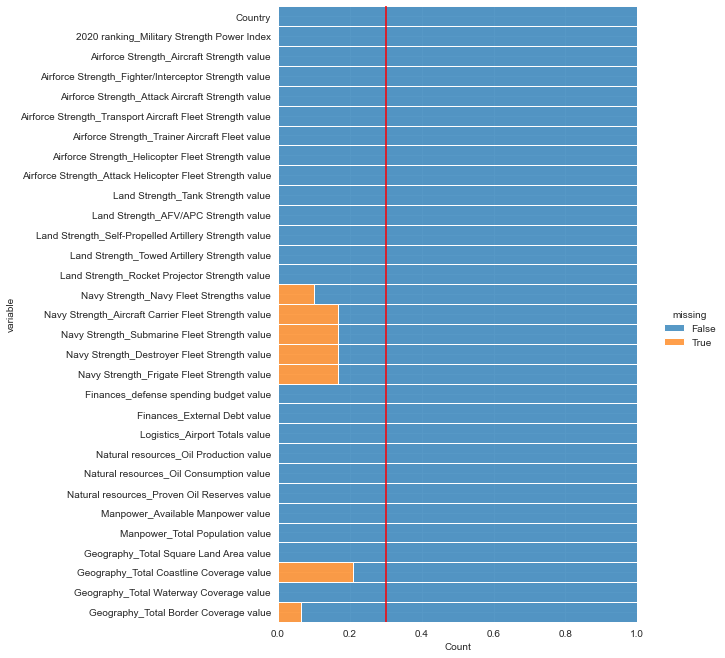

In [33]:
plt.figure(figsize=(4,6))
sns.displot(
    data=df.isnull().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    height=9.25
)
plt.axvline(0.3,color="r")
plt.show()

### 3.5. Fix the dtypes

In [34]:
df.select_dtypes('object')

,Country,Finances_defense spending budget value,Finances_External Debt value,Natural resources_Oil Production value,Natural resources_Oil Consumption value,Natural resources_Proven Oil Reserves value,Manpower_Available Manpower value,Manpower_Total Population value,Geography_Total Square Land Area value,Geography_Total Coastline Coverage value,Geography_Total Waterway Coverage value
0,Afghanistan,"12,00,00,00,000","2,84,00,00,000",0.000,5500.000,0.000,"1,43,25,743","3,49,40,837","6,52,230",0.000,1200.000
1,Albania,"25,00,00,000","9,50,50,00,000",16000.000,42500.000,"16,83,00,000","15,19,438","30,57,220",28748.000,362.000,41.000
2,Algeria,"13,00,00,00,000","6,26,00,00,000","13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998.000,0.000
3,Angola,"7,00,00,00,000","42,08,00,00,000","16,66,000",82300.000,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600.000,1300.000
4,Argentina,"4,20,00,00,000","2,14,90,00,00,000","4,79,400","6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400",4989.000,11000.000
5,Armenia,"1,38,50,00,000","10,41,00,00,000",0.000,47500.000,0.000,"16,96,085","30,38,217",29743.000,NaN,0.000
6,Australia,"26,30,00,00,000","17,14,00,00,00,000","2,63,000","10,05,000","1,82,10,00,000","1,08,08,002","2,34,70,145","77,41,220",25760.000,2000.000
7,Austria,"3,38,00,00,000","6,30,80,00,00,000",14260.000,"2,15,000","4,30,00,000","40,17,691","87,93,370",83871.000,NaN,0.000
8,Azerbaijan,"2,80,50,00,000","17,41,00,00,000","7,89,300","1,80,000","7,00,00,00,000","50,42,346","1,00,46,516",86600.000,713.000,0.000
9,Bahrain,"1,41,50,00,000","52,15,00,00,000",45000.000,55000.000,"12,46,00,000","8,06,505","14,22,659",760.000,161.000,0.000


In [35]:
import re
def convert(x):
    if x is not np.nan:
        x = str(x)
        y = re.findall('\d+', x)
        if '.' in x:
            return float(''.join(y[:-1]))
        else:
            return float(''.join(y))

In [36]:
for i in df.select_dtypes('object').columns[1:]:
    df[i] = df[i].apply(convert)

In [37]:
df.select_dtypes('object')

,Country
0,Afghanistan
1,Albania
2,Algeria
3,Angola
4,Argentina
5,Armenia
6,Australia
7,Austria
8,Azerbaijan
9,Bahrain


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 31 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Country                                                    138 non-null    object 
 1   2020 ranking_Military Strength Power Index                 138 non-null    float64
 2   Airforce Strength_Aircraft Strength value                  138 non-null    float64
 3   Airforce Strength_Fighter/Interceptor Strength value       138 non-null    float64
 4   Airforce Strength_Attack Aircraft Strength value           138 non-null    float64
 5   Airforce Strength_Transport Aircraft Fleet Strength value  138 non-null    float64
 6   Airforce Strength_Trainer Aircraft Fleet value             138 non-null    float64
 7   Airforce Strength_Helicopter Fleet Strength value          138 non-null    float64
 8   Airforce S

In [39]:
df.head()

,Country,2020 ranking_Military Strength Power Index,Airforce Strength_Aircraft Strength value,Airforce Strength_Fighter/Interceptor Strength value,Airforce Strength_Attack Aircraft Strength value,Airforce Strength_Transport Aircraft Fleet Strength value,Airforce Strength_Trainer Aircraft Fleet value,Airforce Strength_Helicopter Fleet Strength value,Airforce Strength_Attack Helicopter Fleet Strength value,Land Strength_Tank Strength value,Land Strength_AFV/APC Strength value,Land Strength_Self-Propelled Artillery Strength value,Land Strength_Towed Artillery Strength value,Land Strength_Rocket Projector Strength value,Navy Strength_Navy Fleet Strengths value,Navy Strength_Aircraft Carrier Fleet Strength value,Navy Strength_Submarine Fleet Strength value,Navy Strength_Destroyer Fleet Strength value,Navy Strength_Frigate Fleet Strength value,Finances_defense spending budget value,Finances_External Debt value,Logistics_Airport Totals value,Natural resources_Oil Production value,Natural resources_Oil Consumption value,Natural resources_Proven Oil Reserves value,Manpower_Available Manpower value,Manpower_Total Population value,Geography_Total Square Land Area value,Geography_Total Coastline Coverage value,Geography_Total Waterway Coverage value,Geography_Total Border Coverage value
0,Afghanistan,1.344,260.000,0.000,25.000,30.000,0.000,187.000,0.000,0.000,1062.000,0.000,176.000,50.000,0.000,0.000,0.000,0.000,0.000,12000000000.000,2840000000.000,43.000,0.000,5500.000,0.000,14325743.000,34940837.000,652230.000,0.000,1200.000,5987.000
1,Albania,2.314,19.000,0.000,0.000,0.000,0.000,19.000,0.000,0.000,467.000,0.000,0.000,0.000,38.000,0.000,0.000,0.000,0.000,250000000.000,9505000000.000,4.000,16000.000,42500.000,168300000.000,1519438.000,3057220.000,28748.000,362.000,41.000,691.000
2,Algeria,0.466,551.000,103.000,22.000,59.000,87.000,257.000,45.000,880.000,7361.000,320.000,240.000,316.000,201.000,0.000,6.000,0.000,5.000,13000000000.000,6260000000.000,157.000,1306000.000,325000.000,12200000000.000,20741263.000,41657488.000,2381741.000,998.000,0.000,6734.000
3,Angola,0.838,295.000,72.000,18.000,30.000,47.000,126.000,15.000,379.000,595.000,28.000,357.000,115.000,57.000,0.000,0.000,0.000,0.000,7000000000.000,42080000000.000,176.000,1666000.000,82300.000,8273000000.000,6244205.000,30355880.000,1246700.000,1600.000,1300.000,5369.000
4,Argentina,0.652,227.000,24.000,7.000,9.000,64.000,100.000,0.000,370.000,739.000,83.000,172.000,26.000,49.000,0.000,2.000,4.000,0.000,4200000000.000,214900000000.000,1138.000,479400.000,685000.000,2185000000.000,20179430.000,44694198.000,2780400.000,4989.000,11000.000,11968.000


### 3.6. Deal with missing values 
* Hint-1, use wikipedia to fill in missing values ​​comparing with similar countries
* Hint-2, Georeferences of countries can help you

In [40]:
from collections import defaultdict
dictt = defaultdict(list)
for i in df['Country'].values:
    if df[df['Country']==i][df.columns[1:]].isnull().any().any():
        for j in df.columns[1:]:
            if df.loc[df['Country']==i, j].isna().values:
                dictt[i].append(j)

In [41]:
for i in df['Country'].values:
    print(f'***** {i} *****')
    print(dictt[i])
    print()

***** Afghanistan *****
[]

***** Albania *****
[]

***** Algeria *****
[]

***** Angola *****
[]

***** Argentina *****
[]

***** Armenia *****
['Navy Strength_Aircraft Carrier Fleet Strength value', 'Navy Strength_Submarine Fleet Strength value', 'Navy Strength_Destroyer Fleet Strength value', 'Navy Strength_Frigate Fleet Strength value', 'Geography_Total Coastline Coverage value']

***** Australia *****
['Geography_Total Border Coverage value']

***** Austria *****
['Navy Strength_Aircraft Carrier Fleet Strength value', 'Navy Strength_Submarine Fleet Strength value', 'Navy Strength_Destroyer Fleet Strength value', 'Navy Strength_Frigate Fleet Strength value', 'Geography_Total Coastline Coverage value']

***** Azerbaijan *****
[]

***** Bahrain *****
['Geography_Total Border Coverage value']

***** Bangladesh *****
[]

***** Belarus *****
['Navy Strength_Aircraft Carrier Fleet Strength value', 'Navy Strength_Submarine Fleet Strength value', 'Navy Strength_Destroyer Fleet Strength val

In [42]:
df.isnull().sum()

Country                                                       0
2020 ranking_Military Strength Power Index                    0
Airforce Strength_Aircraft Strength value                     0
Airforce Strength_Fighter/Interceptor Strength value          0
Airforce Strength_Attack Aircraft Strength value              0
Airforce Strength_Transport Aircraft Fleet Strength value     0
Airforce Strength_Trainer Aircraft Fleet value                0
Airforce Strength_Helicopter Fleet Strength value             0
Airforce Strength_Attack Helicopter Fleet Strength value      0
Land Strength_Tank Strength value                             0
Land Strength_AFV/APC Strength value                          0
Land Strength_Self-Propelled Artillery Strength value         0
Land Strength_Towed Artillery Strength value                  0
Land Strength_Rocket Projector Strength value                 0
Navy Strength_Navy Fleet Strengths value                     14
Navy Strength_Aircraft Carrier Fleet Str

#### Navy Fleet Strengths value
https://www.globalfirepower.com/navy-ships.php

In [44]:
df['Navy Strength_Navy Fleet Strengths value'] = df['Navy Strength_Navy Fleet Strengths value'].fillna(0)

#### Aircraft Carrier Fleet Strength value
https://www.globalfirepower.com/navy-aircraft-carriers.php

In [45]:
df['Navy Strength_Aircraft Carrier Fleet Strength value'] = df['Navy Strength_Aircraft Carrier Fleet Strength value'].fillna(0)

#### Submarine Fleet Strength value
https://www.globalfirepower.com/navy-submarines.php

In [46]:
df.loc[df['Country']=='South Korea', 'Navy Strength_Submarine Fleet Strength value'] = df.loc[df['Country']=='South Korea', 
                                                            'Navy Strength_Submarine Fleet Strength value'].fillna(22)

In [47]:
df['Navy Strength_Submarine Fleet Strength value'] = df['Navy Strength_Submarine Fleet Strength value'].fillna(0)

#### Destroyer Fleet Strength value
https://www.globalfirepower.com/navy-destroyers.php

In [48]:
df.loc[df['Country']=='South Korea', 'Navy Strength_Destroyer Fleet Strength value'] = df.loc[df['Country']=='South Korea', 
                                                            'Navy Strength_Destroyer Fleet Strength value'].fillna(12)

In [49]:
df['Navy Strength_Destroyer Fleet Strength value'] = df['Navy Strength_Destroyer Fleet Strength value'].fillna(0)

#### Frigate Fleet Strength value
https://www.globalfirepower.com/navy-frigates.php

In [50]:
df.loc[df['Country']=='South Korea', 'Navy Strength_Frigate Fleet Strength value'] = df.loc[df['Country']=='South Korea', 
                                                            'Navy Strength_Frigate Fleet Strength value'].fillna(18)

In [51]:
df['Navy Strength_Frigate Fleet Strength value'] = df['Navy Strength_Frigate Fleet Strength value'].fillna(0)

#### Total Coastline Coverage value
https://www.globalfirepower.com/coastline-coverage.php

In [52]:
df['Geography_Total Coastline Coverage value'] = df['Geography_Total Coastline Coverage value'].fillna(0)

#### Total Border Coverage value
https://www.globalfirepower.com/border-coverage.php

In [53]:
df['Geography_Total Border Coverage value'] = df['Geography_Total Border Coverage value'].fillna(0)

In [54]:
df.isnull().sum()

Country                                                      0
2020 ranking_Military Strength Power Index                   0
Airforce Strength_Aircraft Strength value                    0
Airforce Strength_Fighter/Interceptor Strength value         0
Airforce Strength_Attack Aircraft Strength value             0
Airforce Strength_Transport Aircraft Fleet Strength value    0
Airforce Strength_Trainer Aircraft Fleet value               0
Airforce Strength_Helicopter Fleet Strength value            0
Airforce Strength_Attack Helicopter Fleet Strength value     0
Land Strength_Tank Strength value                            0
Land Strength_AFV/APC Strength value                         0
Land Strength_Self-Propelled Artillery Strength value        0
Land Strength_Towed Artillery Strength value                 0
Land Strength_Rocket Projector Strength value                0
Navy Strength_Navy Fleet Strengths value                     0
Navy Strength_Aircraft Carrier Fleet Strength value    

### 3.7. Drop the features that do not affect military power
* Hint-1,  Georeferences not proper features

In [58]:
X = df.drop(['Geography_Total Square Land Area value', 'Geography_Total Coastline Coverage value', 
             'Geography_Total Waterway Coverage value', 'Geography_Total Border Coverage value'], axis=1)

In [59]:
X.head()

,Country,2020 ranking_Military Strength Power Index,Airforce Strength_Aircraft Strength value,Airforce Strength_Fighter/Interceptor Strength value,Airforce Strength_Attack Aircraft Strength value,Airforce Strength_Transport Aircraft Fleet Strength value,Airforce Strength_Trainer Aircraft Fleet value,Airforce Strength_Helicopter Fleet Strength value,Airforce Strength_Attack Helicopter Fleet Strength value,Land Strength_Tank Strength value,Land Strength_AFV/APC Strength value,Land Strength_Self-Propelled Artillery Strength value,Land Strength_Towed Artillery Strength value,Land Strength_Rocket Projector Strength value,Navy Strength_Navy Fleet Strengths value,Navy Strength_Aircraft Carrier Fleet Strength value,Navy Strength_Submarine Fleet Strength value,Navy Strength_Destroyer Fleet Strength value,Navy Strength_Frigate Fleet Strength value,Finances_defense spending budget value,Finances_External Debt value,Logistics_Airport Totals value,Natural resources_Oil Production value,Natural resources_Oil Consumption value,Natural resources_Proven Oil Reserves value,Manpower_Available Manpower value,Manpower_Total Population value
0,Afghanistan,1.344,260.000,0.000,25.000,30.000,0.000,187.000,0.000,0.000,1062.000,0.000,176.000,50.000,0.000,0.000,0.000,0.000,0.000,12000000000.000,2840000000.000,43.000,0.000,5500.000,0.000,14325743.000,34940837.000
1,Albania,2.314,19.000,0.000,0.000,0.000,0.000,19.000,0.000,0.000,467.000,0.000,0.000,0.000,38.000,0.000,0.000,0.000,0.000,250000000.000,9505000000.000,4.000,16000.000,42500.000,168300000.000,1519438.000,3057220.000
2,Algeria,0.466,551.000,103.000,22.000,59.000,87.000,257.000,45.000,880.000,7361.000,320.000,240.000,316.000,201.000,0.000,6.000,0.000,5.000,13000000000.000,6260000000.000,157.000,1306000.000,325000.000,12200000000.000,20741263.000,41657488.000
3,Angola,0.838,295.000,72.000,18.000,30.000,47.000,126.000,15.000,379.000,595.000,28.000,357.000,115.000,57.000,0.000,0.000,0.000,0.000,7000000000.000,42080000000.000,176.000,1666000.000,82300.000,8273000000.000,6244205.000,30355880.000
4,Argentina,0.652,227.000,24.000,7.000,9.000,64.000,100.000,0.000,370.000,739.000,83.000,172.000,26.000,49.000,0.000,2.000,4.000,0.000,4200000000.000,214900000000.000,1138.000,479400.000,685000.000,2185000000.000,20179430.000,44694198.000


### 3.8. Visualy inspect the some features

In [65]:
import plotly.express as px

In [81]:
fig = px.bar(X, x= X["Country"] , y = X["Airforce Strength_Aircraft Strength value"])
fig.show()

In [82]:
fig = px.box(X, x = X["Airforce Strength_Aircraft Strength value"],
             hover_name=X["Country"])
fig.show()

In [83]:
fig = px.bar(X, x= X["Country"], y = X['Navy Strength_Navy Fleet Strengths value'])
fig.show()

In [84]:
fig = px.box(X, x = X["Navy Strength_Navy Fleet Strengths value"],
             hover_name=X["Country"])
fig.show()

In [85]:
fig = px.bar(X, x= X["Country"], y = X['Land Strength_Tank Strength value'])
fig.show()

In [86]:
fig = px.box(X, x = X["Land Strength_Tank Strength value"],
             hover_name=X["Country"])
fig.show()

In [87]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Box(x=X["Finances_External Debt value"],
              hovertext=X["Country"],
              name = "Finances_External Debt value")
             )
fig.add_trace(go.Box(x=X["Finances_defense spending budget value"],
                     hovertext=X["Country"],
                    name = "Finances_defense spending budget value")
             )
fig.show()

### 3.9. Decriptive statistics

In [78]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
2020 ranking_Military Strength Power Index,138.000,1.461,1.324,0.061,0.575,1.034,2.022,10.168
Airforce Strength_Aircraft Strength value,138.000,388.471,1231.982,0.000,33.000,111.000,290.250,13264.000
Airforce Strength_Fighter/Interceptor Strength value,138.000,81.565,230.325,0.000,0.000,17.000,60.500,2085.000
Airforce Strength_Attack Aircraft Strength value,138.000,25.761,94.528,0.000,0.000,0.000,15.750,742.000
Airforce Strength_Transport Aircraft Fleet Strength value,138.000,30.232,92.330,0.000,3.000,9.000,26.000,945.000
Airforce Strength_Trainer Aircraft Fleet value,138.000,82.833,240.804,0.000,4.250,26.000,79.250,2643.000
Airforce Strength_Helicopter Fleet Strength value,138.000,154.065,520.184,0.000,15.250,44.000,126.750,5768.000
Airforce Strength_Attack Helicopter Fleet Strength value,138.000,25.623,97.326,0.000,0.000,2.000,17.750,967.000
Land Strength_Tank Strength value,138.000,646.565,1515.464,0.000,19.250,153.000,436.250,12950.000
Land Strength_AFV/APC Strength value,138.000,2485.696,5410.546,0.000,250.250,734.500,2000.000,39253.000


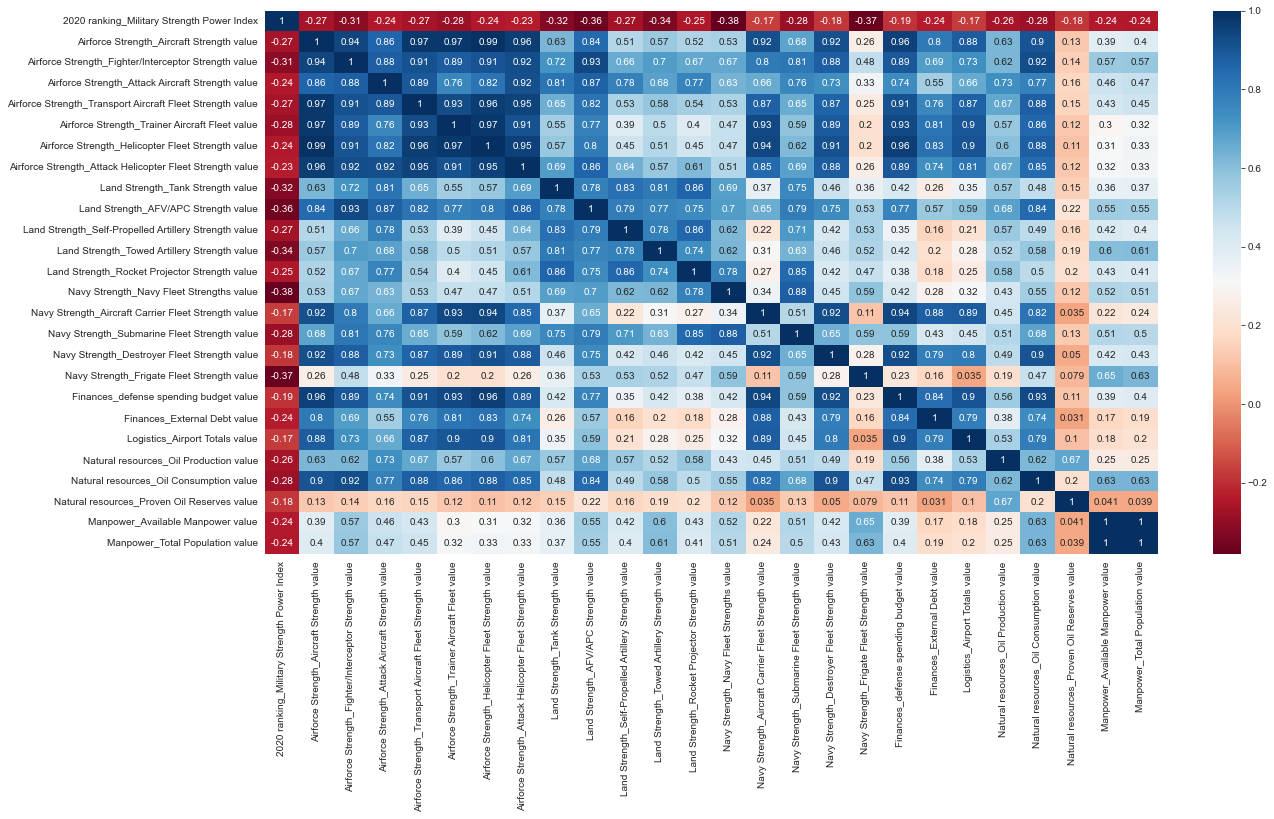

In [80]:
plt.figure(figsize=(20,10))
sns.heatmap(X.corr(), annot=True, cmap='RdBu');

## 4. Data Preprocessing

In [ ]:
X = X.drop(["Country"], axis=1)

In [91]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

## 5. Modelling with K-Means

### 5.1. Hopkins Test 
#### Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express no clusterability, a score tending to 1 express an uniform distrubution so clustering can't be useful and  0 express  not an uniform distrubution hence clusterering can be useful.

In [92]:
from pyclustertend import hopkins

In [93]:
X_scaled.shape

(138, 26)

In [94]:
hopkins(X_scaled, X_scaled.shape[0])

0.07567143587439074

The dataset has high clusterability.

### 5.2. Clustering with K-means

#### 5.2.1. Elbow Method 
#### We use this method to find optimal k value by looking up to break point of graph. 

In [106]:
from sklearn.cluster import KMeans
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_scaled)
    ssd.append(model.inertia_)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

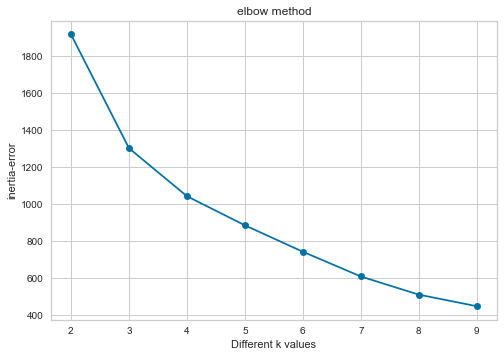

In [107]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method"); 

In [98]:
ssd

[1914.8988009153632,
 1301.7120698014176,
 1042.9611588819985,
 886.052914281842,
 743.5610497710966,
 610.2141688207317,
 512.335895380181,
 450.02601297356244,
 397.4865464139257,
 346.14415930707986,
 318.2526530724428,
 288.84857221496253,
 263.2633851574339]

In [99]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,613.187
3,258.751
4,156.908
5,142.492
6,133.347
7,97.878
8,62.310
9,52.539
10,51.342


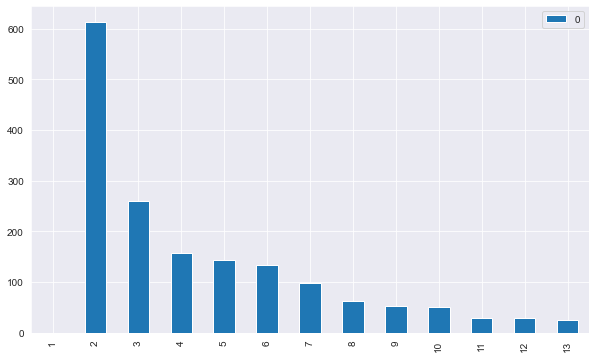

In [100]:
df_diff.plot(kind='bar');

<IPython.core.display.Javascript object>

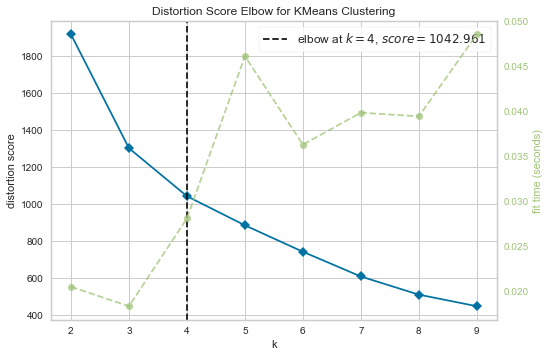

In [104]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,10))

visualizer.fit(X_scaled)        
visualizer.show();

#### 5.2.2. Silhouette Analysis

In [102]:
from sklearn.metrics import silhouette_score

In [105]:
range_n_clusters = range(2,10)
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X_scaled)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

<IPython.core.display.Javascript object>

For n_clusters=2, the silhouette score is 0.8632584034182145


<IPython.core.display.Javascript object>

For n_clusters=3, the silhouette score is 0.8175531660446754


<IPython.core.display.Javascript object>

For n_clusters=4, the silhouette score is 0.4941837230746654


<IPython.core.display.Javascript object>

For n_clusters=5, the silhouette score is 0.5164174302723292


<IPython.core.display.Javascript object>

For n_clusters=6, the silhouette score is 0.5115586895835443


<IPython.core.display.Javascript object>

For n_clusters=7, the silhouette score is 0.47692135876463515


<IPython.core.display.Javascript object>

For n_clusters=8, the silhouette score is 0.46721633158311837


<IPython.core.display.Javascript object>

For n_clusters=9, the silhouette score is 0.41205613942468394


#### I decided to continue with n_clusters=4.

### 5.3. Model Building and label visualisation

In [108]:
model = KMeans(n_clusters=4, random_state=42)
model.fit_predict(X_scaled)

<IPython.core.display.Javascript object>

array([0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       3, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 3,
       0, 3, 0, 0, 0, 3, 3, 3, 3, 0, 3, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 3, 0, 0, 0, 0, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 3, 3, 3, 1, 0,
       0, 3, 3, 0, 0, 0], dtype=int32)

### 5.4. Evaluate 

In [111]:
df["predicted_clusters_kmeans"] = model.labels_

In [109]:
X_scaled['predicted_clusters_kmeans'] = model.labels_

In [112]:
df[['Country', 'predicted_clusters_kmeans']]

,Country,predicted_clusters_kmeans
0,Afghanistan,0
1,Albania,0
2,Algeria,3
3,Angola,0
4,Argentina,0
5,Armenia,0
6,Australia,0
7,Austria,0
8,Azerbaijan,0
9,Bahrain,0


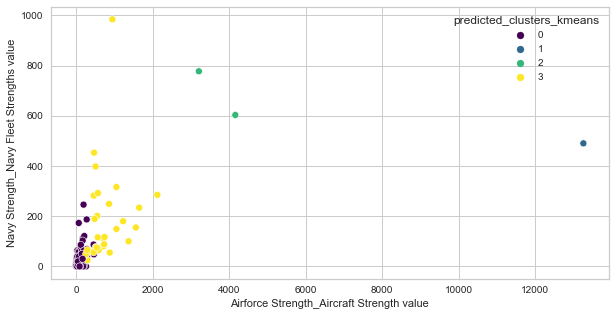

In [113]:
plt.figure(figsize=(10,5))
sns.scatterplot(df["Airforce Strength_Aircraft Strength value"], 
                df["Navy Strength_Navy Fleet Strengths value"], hue=df.predicted_clusters_kmeans,palette= "viridis");

In [121]:
fig = px.scatter_3d(x=df["Airforce Strength_Aircraft Strength value"],
                   y=df["Finances_defense spending budget value"],
                   z=df["Finances_External Debt value"],
                   color=df.predicted_clusters_kmeans,
                   labels = {"x": "Airforce Strength_Aircraft Strength value",
                             "y": "Finances_defense spending budget value",
                             "z": "Finances_External Debt value"},
                   hover_name=df["Country"])
fig.show()

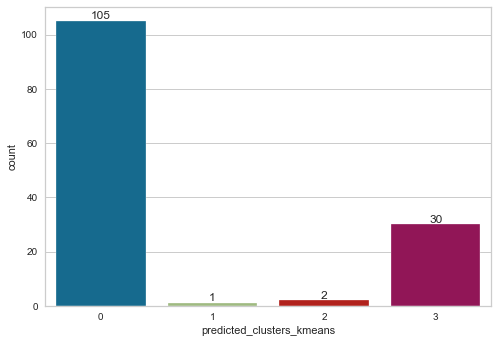

In [128]:
ax = sns.countplot(data=df, x='predicted_clusters_kmeans')
ax.bar_label(ax.containers[0]);

In [132]:
df[df.predicted_clusters_kmeans == 0]['Country']

0                           Afghanistan
1                               Albania
3                                Angola
4                             Argentina
5                               Armenia
6                             Australia
7                               Austria
8                            Azerbaijan
9                               Bahrain
10                           Bangladesh
11                              Belarus
12                              Belgium
13                               Bhutan
14                              Bolivia
15               Bosnia and Herzegovina
16                             Botswana
18                             Bulgaria
19                         Burkina Faso
20                             Cambodia
21                             Cameroon
23             Central African Republic
24                                 Chad
25                                Chile
28                              Croatia
29                                 Cuba


In [133]:
df[df.predicted_clusters_kmeans == 1]['Country']

130    United States
Name: Country, dtype: object

In [134]:
df[df.predicted_clusters_kmeans == 2]['Country']

26      China
101    Russia
Name: Country, dtype: object

In [135]:
df[df.predicted_clusters_kmeans == 3]['Country']

2                   Algeria
17                   Brazil
22                   Canada
27                 Colombia
35                    Egypt
40                   France
43                  Germany
45                   Greece
49                    India
50                Indonesia
51                     Iran
52                     Iraq
54                   Israel
55                    Italy
57                    Japan
73                   Mexico
87              North Korea
91                 Pakistan
102            Saudi Arabia
110             South Korea
112                   Spain
118                   Syria
119                  Taiwan
122                Thailand
124                  Turkey
127                 Ukraine
128    United Arab Emirates
129          United Kingdom
133               Venezuela
134                 Vietnam
Name: Country, dtype: object

In [136]:
clus_pred = X_scaled.iloc[:,[0,1,2,3,4,5,6,7,8,9,-1]].groupby("predicted_clusters_kmeans").mean().T
clus_pred

predicted_clusters_kmeans,0,1,2,3
2020 ranking_Military Strength Power Index,0.268,-1.061,-1.055,-0.832
Airforce Strength_Aircraft Strength value,-0.239,10.489,2.687,0.306
Airforce Strength_Fighter/Interceptor Strength value,-0.279,8.730,4.231,0.404
Airforce Strength_Attack Aircraft Strength value,-0.221,7.318,5.635,0.154
Airforce Strength_Transport Aircraft Fleet Strength value,-0.232,9.944,3.193,0.269
Airforce Strength_Trainer Aircraft Fleet value,-0.247,10.670,1.345,0.421
Airforce Strength_Helicopter Fleet Strength value,-0.220,10.832,2.050,0.271
Airforce Strength_Attack Helicopter Fleet Strength value,-0.211,9.708,3.923,0.154
Land Strength_Tank Strength value,-0.296,3.737,5.019,0.576
Land Strength_AFV/APC Strength value,-0.331,6.820,5.107,0.589


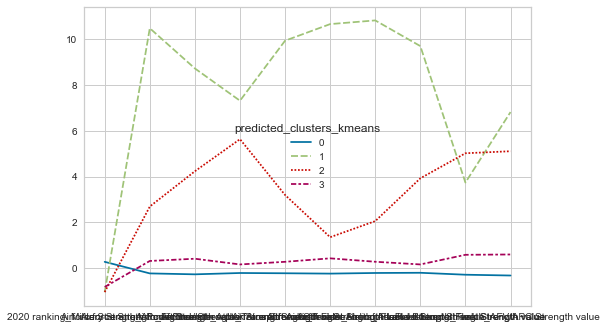

In [137]:
sns.lineplot(data = clus_pred);

In [138]:
clus_pred = X_scaled.iloc[:,[10,11,12,13,14,15,16,-1]].groupby("predicted_clusters_kmeans").mean().T
clus_pred

predicted_clusters_kmeans,0,1,2,3
Land Strength_Self-Propelled Artillery Strength value,-0.239,1.828,6.899,0.317
Land Strength_Towed Artillery Strength value,-0.314,2.922,4.532,0.699
Land Strength_Rocket Projector Strength value,-0.232,2.505,6.419,0.301
Navy Strength_Navy Fleet Strengths value,-0.334,2.948,4.373,0.779
Navy Strength_Aircraft Carrier Fleet Strength value,-0.156,10.948,0.657,0.138
Navy Strength_Submarine Fleet Strength value,-0.273,4.880,5.037,0.458
Navy Strength_Destroyer Fleet Strength value,-0.177,9.736,2.642,0.120


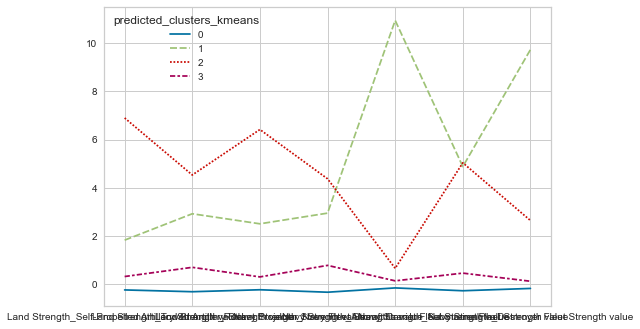

In [139]:
sns.lineplot(data = clus_pred);

In [140]:
clus_pred = X_scaled.iloc[:,[17,18,19,20,21,22,23,24,25,-1]].groupby("predicted_clusters_kmeans").mean().T
clus_pred

predicted_clusters_kmeans,0,1,2,3
Navy Strength_Frigate Fleet Strength value,-0.306,-0.497,4.532,0.784
Finances_defense spending budget value,-0.173,10.974,1.916,0.111
Finances_External Debt value,-0.185,9.449,0.298,0.314
Logistics_Airport Totals value,-0.151,10.941,0.474,0.131
Natural resources_Oil Production value,-0.249,5.278,3.987,0.431
Natural resources_Oil Consumption value,-0.254,8.930,3.545,0.356
Natural resources_Proven Oil Reserves value,-0.211,0.577,0.959,0.655
Manpower_Available Manpower value,-0.201,1.418,4.582,0.350
Manpower_Total Population value,-0.203,1.678,4.317,0.367


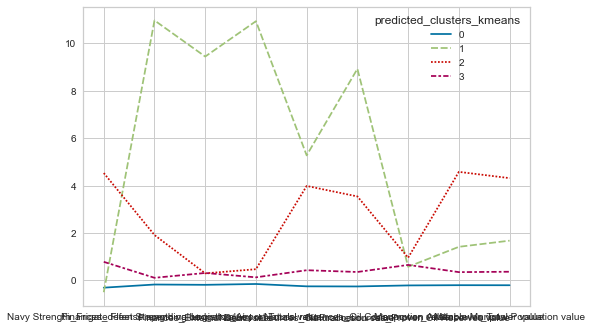

In [141]:
sns.lineplot(data = clus_pred);

In [142]:
X2 = X_scaled.iloc[:, [1,4,5,6,7,14,16,18,19,20]]
X2

,Airforce Strength_Aircraft Strength value,Airforce Strength_Transport Aircraft Fleet Strength value,Airforce Strength_Trainer Aircraft Fleet value,Airforce Strength_Helicopter Fleet Strength value,Airforce Strength_Attack Helicopter Fleet Strength value,Navy Strength_Aircraft Carrier Fleet Strength value,Navy Strength_Destroyer Fleet Strength value,Finances_defense spending budget value,Finances_External Debt value,Logistics_Airport Totals value
0,-0.105,-0.003,-0.345,0.064,-0.264,-0.177,-0.196,-0.030,-0.281,-0.204
1,-0.301,-0.329,-0.345,-0.261,-0.264,-0.177,-0.196,-0.205,-0.277,-0.237
2,0.132,0.313,0.017,0.199,0.200,-0.177,-0.196,-0.015,-0.279,-0.110
3,-0.076,-0.003,-0.149,-0.054,-0.110,-0.177,-0.196,-0.104,-0.259,-0.094
4,-0.132,-0.231,-0.078,-0.104,-0.264,-0.177,0.240,-0.146,-0.165,0.702
5,-0.264,-0.296,-0.291,-0.226,-0.058,-0.177,-0.196,-0.188,-0.277,-0.231
6,0.062,0.084,0.380,-0.041,-0.037,0.935,0.022,0.183,0.649,0.157
7,-0.219,-0.209,-0.212,-0.178,-0.264,-0.177,-0.196,-0.158,0.060,-0.197
8,-0.197,-0.318,-0.224,-0.127,-0.089,-0.177,-0.196,-0.167,-0.273,-0.209
9,-0.228,-0.307,-0.191,-0.172,-0.037,-0.177,-0.196,-0.188,-0.254,-0.237


In [143]:
hopkins(X2, X2.shape[0])

0.040621631255510625

In [150]:
ssd = []

K = range(2,10)

for k in K:
    model3 = KMeans(n_clusters=k)
    model3.fit(X2)
    ssd.append(model3.inertia_)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

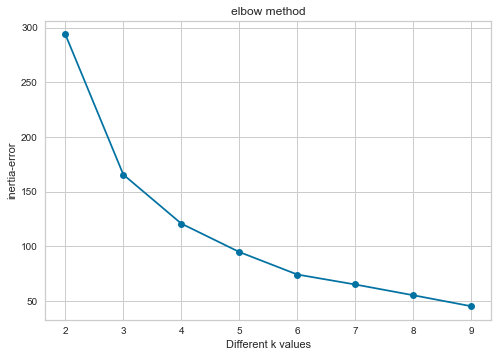

In [151]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method");

In [146]:
df_diff = pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,128.244
3,44.800
4,23.067
5,22.952
6,9.143
7,11.034
8,9.488
9,6.882
10,5.883


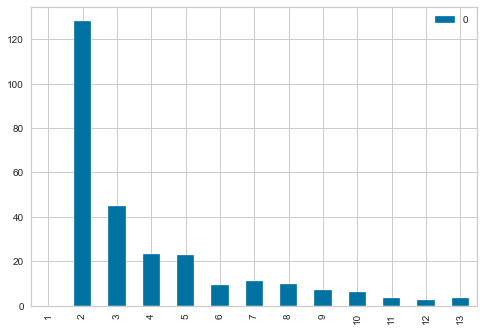

In [147]:
df_diff.plot(kind='bar');

<IPython.core.display.Javascript object>

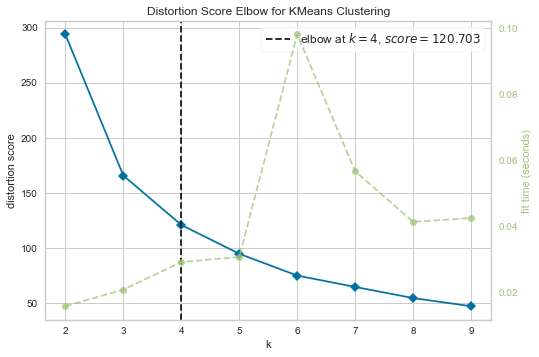

In [149]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,10))

visualizer.fit(X2)        
visualizer.show();

In [152]:
range_n_clusters = range(2,10)
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X2)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(X2, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

<IPython.core.display.Javascript object>

For n_clusters=2, the silhouette score is 0.9541121111474936


<IPython.core.display.Javascript object>

For n_clusters=3, the silhouette score is 0.7976938644547126


<IPython.core.display.Javascript object>

For n_clusters=4, the silhouette score is 0.7499758001247175


<IPython.core.display.Javascript object>

For n_clusters=5, the silhouette score is 0.6615953747169165


<IPython.core.display.Javascript object>

For n_clusters=6, the silhouette score is 0.649830573678682


<IPython.core.display.Javascript object>

For n_clusters=7, the silhouette score is 0.6105240125488797


<IPython.core.display.Javascript object>

For n_clusters=8, the silhouette score is 0.49844622206300454


<IPython.core.display.Javascript object>

For n_clusters=9, the silhouette score is 0.6313512617618536


#### I will still keep k as 4.

### 5.5. Final Model

In [153]:
final_model = KMeans(n_clusters=4, random_state=42)
final_model.fit_predict(X2)

<IPython.core.display.Javascript object>

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3,
       1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 1,
       1, 1, 1, 1, 1, 1], dtype=int32)

In [154]:
X2["predicted_clusters_k_means_updated"] = final_model.labels_

In [158]:
df["predicted_clusters_k_means_updated"] = final_model.labels_

In [160]:
df[['Country', 'predicted_clusters_k_means_updated']]

,Country,predicted_clusters_k_means_updated
0,Afghanistan,1
1,Albania,1
2,Algeria,1
3,Angola,1
4,Argentina,1
5,Armenia,1
6,Australia,1
7,Austria,1
8,Azerbaijan,1
9,Bahrain,1


In [166]:
X2.groupby("predicted_clusters_k_means_updated").mean().T

predicted_clusters_k_means_updated,0,1,2,3
Airforce Strength_Aircraft Strength value,10.489,-0.163,2.687,0.715
Airforce Strength_Transport Aircraft Fleet Strength value,9.944,-0.163,3.193,0.642
Airforce Strength_Trainer Aircraft Fleet value,10.670,-0.142,1.345,0.681
Airforce Strength_Helicopter Fleet Strength value,10.832,-0.159,2.050,0.774
Airforce Strength_Attack Helicopter Fleet Strength value,9.708,-0.161,3.923,0.443
Navy Strength_Aircraft Carrier Fleet Strength value,10.948,-0.143,0.657,0.856
Navy Strength_Destroyer Fleet Strength value,9.736,-0.177,2.642,1.098
Finances_defense spending budget value,10.974,-0.143,1.916,0.491
Finances_External Debt value,9.449,-0.171,0.298,1.688
Logistics_Airport Totals value,10.941,-0.094,0.474,0.023


In [167]:
fig= px.line(X2.groupby("predicted_clusters_k_means_updated").mean().T)
fig.show()

### The final clustering seems to be appropriate.
- 0 - United States: The only super power in the world
- 1 - All other countries that have weak to medium level military power.
- 2 - China, Russia which have military powers close to a super power.
- 3 - France, Germany, India, Italy, Japan, South Korea, United Kingdom, which have medium to high level military power.

## 6. Modeling with Hierarchical Clustering

### 6.1. Dendogram

In [169]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [170]:
hc_ward = linkage(y = X_scaled, method = "ward")
hc_complete = linkage(X_scaled, "complete")
hc_average = linkage(X_scaled, "average")
hc_single = linkage(X_scaled, "single")

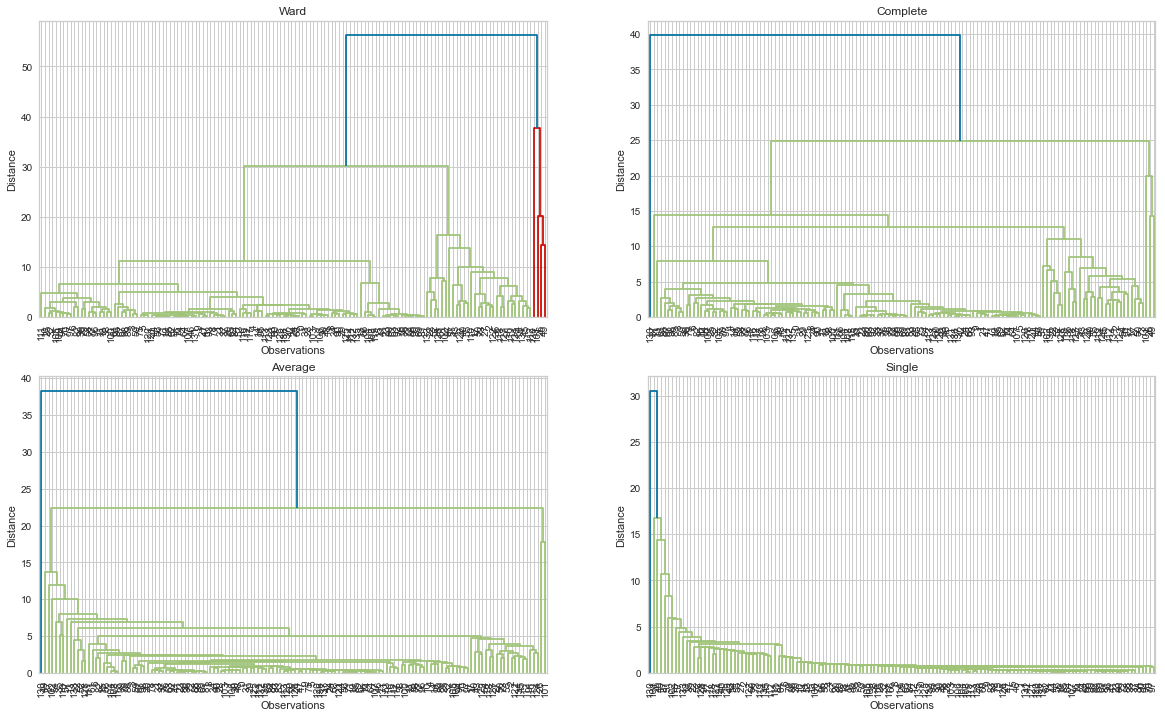

In [171]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10);

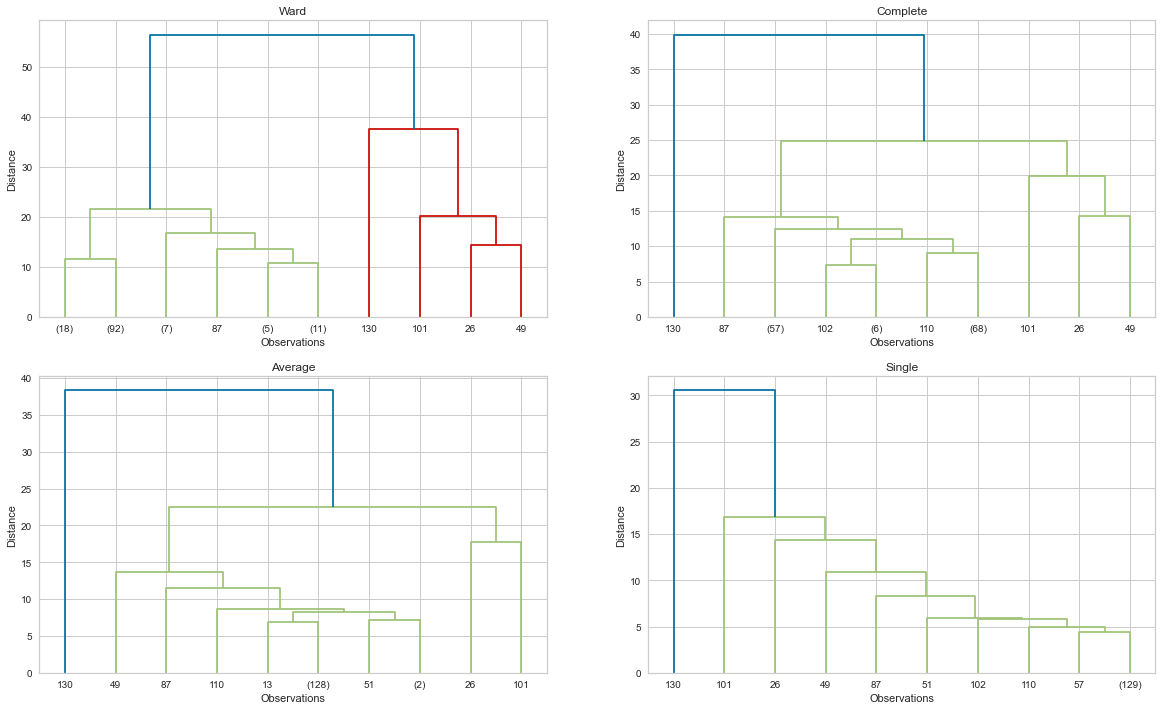

In [87]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, truncate_mode='lastp', p=10);

### 6.2. Model Building and label visualisation

In [172]:
from sklearn.cluster import AgglomerativeClustering

In [173]:
from sklearn.metrics import silhouette_score

In [174]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X_scaled)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X_scaled, model.labels_)}')

Silhouette Score for 2 clusters: 0.8332998720679128
Silhouette Score for 3 clusters: 0.8026967453505656
Silhouette Score for 4 clusters: 0.5596798171670266
Silhouette Score for 5 clusters: 0.5598505565262176
Silhouette Score for 6 clusters: 0.5700035299074065
Silhouette Score for 7 clusters: 0.569606953384356
Silhouette Score for 8 clusters: 0.5653557027925249
Silhouette Score for 9 clusters: 0.3188961488628439


#### I will continue with k=4

In [189]:
model1 = AgglomerativeClustering(n_clusters=4, affinity = "euclidean", linkage = "ward")
model1.fit_predict(X_scaled)

array([3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3,
       1, 3, 3, 3, 0, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 1, 3, 3, 1,
       3, 1, 3, 3, 3, 0, 1, 1, 1, 3, 1, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1,
       3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 1, 3, 3, 3, 3, 3, 3, 3,
       1, 3, 1, 3, 3, 3, 3, 3, 1, 1, 3, 3, 1, 3, 1, 3, 3, 1, 1, 1, 2, 3,
       3, 1, 1, 3, 3, 3])

In [190]:
X_scaled['predicted_clusters_hierarchical'] = model1.labels_

In [191]:
df["predicted_clusters_hierarchical"] = model1.labels_

In [205]:
fig = px.scatter_3d(x=df["Airforce Strength_Aircraft Strength value"],
                   y=df["Finances_defense spending budget value"],
                   z=df["Finances_External Debt value"],
                   color=df["predicted_clusters_hierarchical"],
                   labels = {"x": "Airforce Strength_Aircraft Strength value",
                             "y": "Finances_defense spending budget value",
                             "z": "Finances_External Debt value"},
                   hover_name=df["Country"])
fig.show()

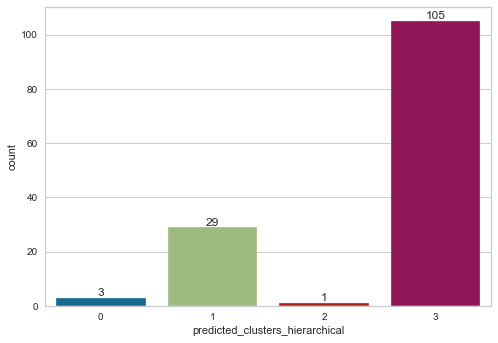

In [206]:
ax = sns.countplot(data=df, x='predicted_clusters_hierarchical')
ax.bar_label(ax.containers[0]);

In [192]:
clus_pred2 = X_scaled.iloc[:,[0,1,2,3,4,5,6,7,8,9,-1]].groupby("predicted_clusters_hierarchical").mean().T
clus_pred2

predicted_clusters_hierarchical,0,1,2,3
2020 ranking_Military Strength Power Index,-1.049,-0.825,-1.061,0.268
Airforce Strength_Aircraft Strength value,2.262,0.268,10.489,-0.239
Airforce Strength_Fighter/Interceptor Strength value,3.484,0.349,8.730,-0.279
Airforce Strength_Attack Aircraft Strength value,4.274,0.105,7.318,-0.221
Airforce Strength_Transport Aircraft Fleet Strength value,2.925,0.196,9.944,-0.232
Airforce Strength_Trainer Aircraft Fleet value,1.280,0.395,10.670,-0.247
Airforce Strength_Helicopter Fleet Strength value,1.732,0.243,10.832,-0.220
Airforce Strength_Attack Helicopter Fleet Strength value,2.606,0.160,9.708,-0.211
Land Strength_Tank Strength value,4.151,0.512,3.737,-0.296
Land Strength_AFV/APC Strength value,3.788,0.570,6.820,-0.331


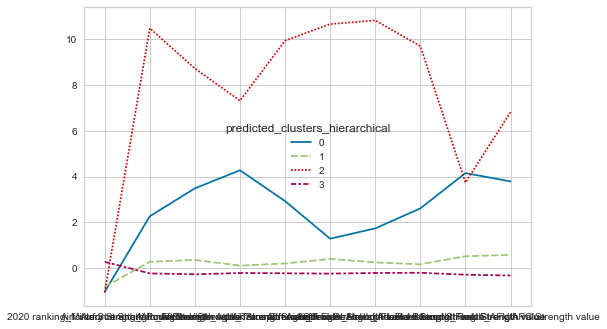

In [193]:
sns.lineplot(data = clus_pred2);

In [194]:
clus_pred2 = X_scaled.iloc[:,[10,11,12,13,14,15,16,-1]].groupby("predicted_clusters_hierarchical").mean().T
clus_pred2

predicted_clusters_hierarchical,0,1,2,3
Land Strength_Self-Propelled Artillery Strength value,4.610,0.327,1.828,-0.239
Land Strength_Towed Artillery Strength value,4.543,0.565,2.922,-0.314
Land Strength_Rocket Projector Strength value,4.355,0.304,2.505,-0.232
Navy Strength_Navy Fleet Strengths value,3.411,0.755,2.948,-0.334
Navy Strength_Aircraft Carrier Fleet Strength value,0.564,0.130,10.948,-0.156
Navy Strength_Submarine Fleet Strength value,3.670,0.442,4.880,-0.273
Navy Strength_Destroyer Fleet Strength value,2.060,0.094,9.736,-0.177


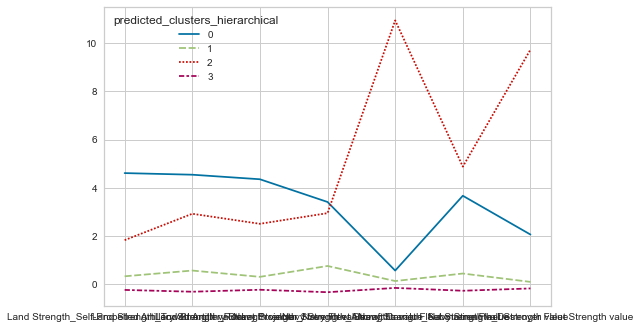

In [195]:
sns.lineplot(data = clus_pred2);

In [197]:
clus_pred2 = X_scaled.iloc[:,[17,18,19,20,21,22,23,24,25,-1]].groupby("predicted_clusters_hierarchical").mean().T
clus_pred2

predicted_clusters_hierarchical,0,1,2,3
Navy Strength_Frigate Fleet Strength value,3.559,0.756,-0.497,-0.306
Finances_defense spending budget value,1.511,0.091,10.974,-0.173
Finances_External Debt value,0.196,0.325,9.449,-0.185
Logistics_Airport Totals value,0.331,0.133,10.941,-0.151
Natural resources_Oil Production value,2.688,0.443,5.278,-0.249
Natural resources_Oil Consumption value,3.026,0.300,8.930,-0.254
Natural resources_Proven Oil Reserves value,0.582,0.683,0.577,-0.211
Manpower_Available Manpower value,5.418,0.118,1.418,-0.201
Manpower_Total Population value,5.398,0.119,1.678,-0.203


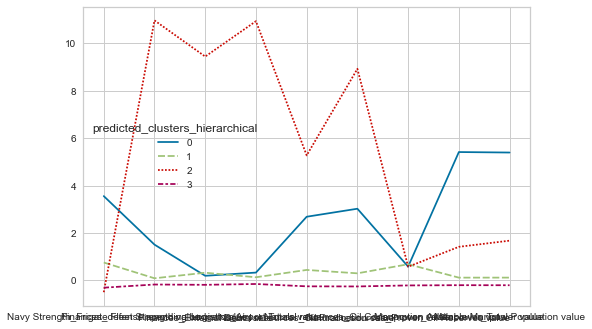

In [198]:
sns.lineplot(data = clus_pred2);

In [207]:
X3 = X_scaled.iloc[:, [1,4,5,6,7,14,16,18,19,20]]
X3.head()

,Airforce Strength_Aircraft Strength value,Airforce Strength_Transport Aircraft Fleet Strength value,Airforce Strength_Trainer Aircraft Fleet value,Airforce Strength_Helicopter Fleet Strength value,Airforce Strength_Attack Helicopter Fleet Strength value,Navy Strength_Aircraft Carrier Fleet Strength value,Navy Strength_Destroyer Fleet Strength value,Finances_defense spending budget value,Finances_External Debt value,Logistics_Airport Totals value
0,-0.105,-0.003,-0.345,0.064,-0.264,-0.177,-0.196,-0.030,-0.281,-0.204
1,-0.301,-0.329,-0.345,-0.261,-0.264,-0.177,-0.196,-0.205,-0.277,-0.237
2,0.132,0.313,0.017,0.199,0.200,-0.177,-0.196,-0.015,-0.279,-0.110
3,-0.076,-0.003,-0.149,-0.054,-0.110,-0.177,-0.196,-0.104,-0.259,-0.094
4,-0.132,-0.231,-0.078,-0.104,-0.264,-0.177,0.240,-0.146,-0.165,0.702


In [200]:
hc_ward = linkage(y = X3, method = "ward")
hc_complete = linkage(X3, "complete")
hc_average = linkage(X3, "average")
hc_single = linkage(X3, "single")

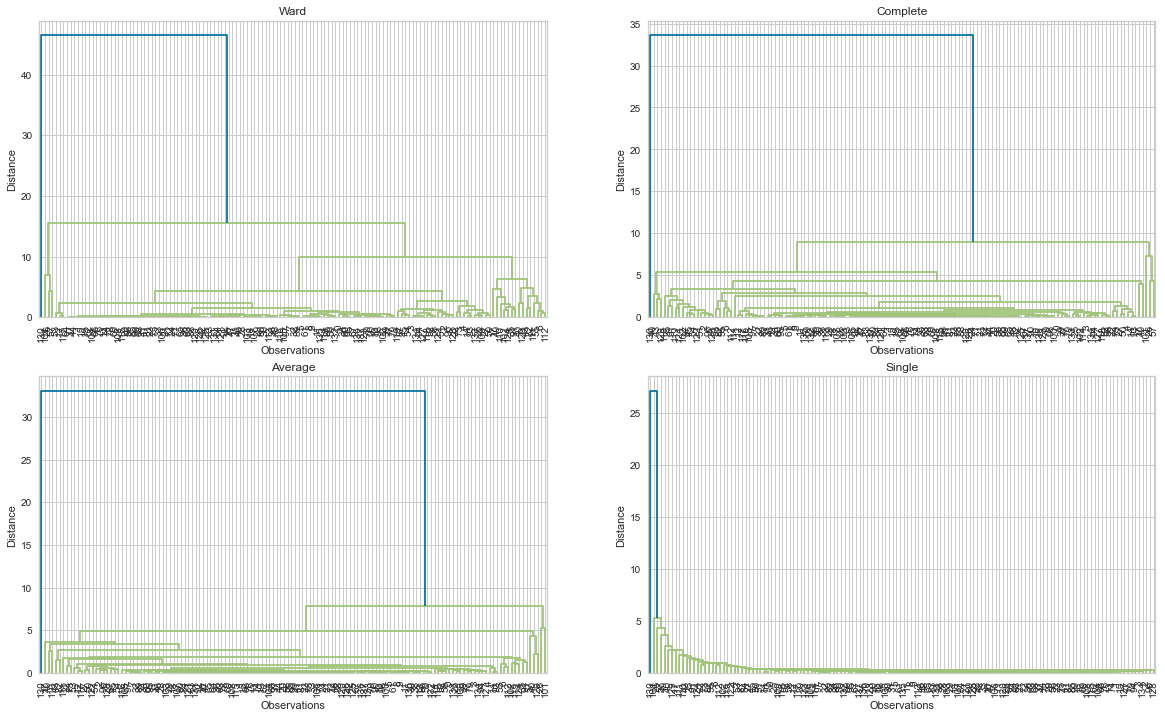

In [201]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10);

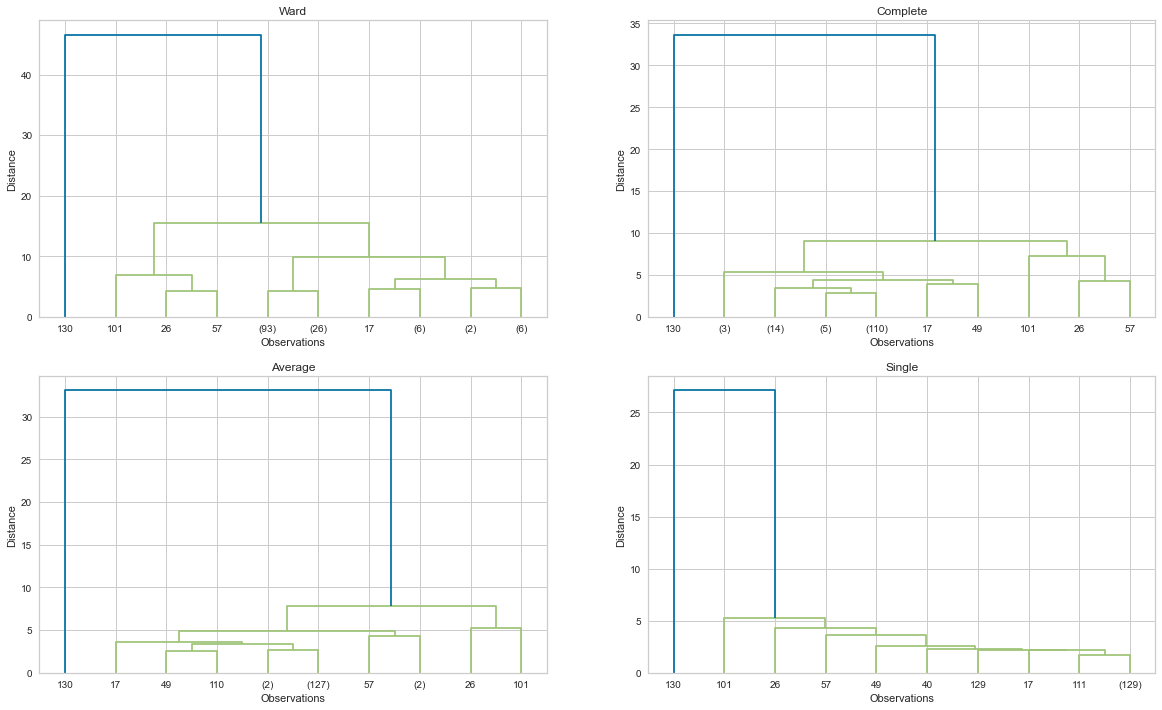

In [202]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, truncate_mode='lastp', p=10);

In [203]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X3)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X3, model.labels_)}')

Silhouette Score for 2 clusters: 0.9541121111474936
Silhouette Score for 3 clusters: 0.8374156368772799
Silhouette Score for 4 clusters: 0.6838757524017893
Silhouette Score for 5 clusters: 0.6841369726124268
Silhouette Score for 6 clusters: 0.6894910982241329
Silhouette Score for 7 clusters: 0.6541891415527706
Silhouette Score for 8 clusters: 0.6572166246267966
Silhouette Score for 9 clusters: 0.6559137678525782


#### I will stick to k=4

In [208]:
final_model = AgglomerativeClustering(n_clusters=4, affinity = "euclidean", 
                                      linkage = "ward")
clusters = final_model.fit_predict(X3)

### 6.3. Evaluate 

In [209]:
X3.head()

,Airforce Strength_Aircraft Strength value,Airforce Strength_Transport Aircraft Fleet Strength value,Airforce Strength_Trainer Aircraft Fleet value,Airforce Strength_Helicopter Fleet Strength value,Airforce Strength_Attack Helicopter Fleet Strength value,Navy Strength_Aircraft Carrier Fleet Strength value,Navy Strength_Destroyer Fleet Strength value,Finances_defense spending budget value,Finances_External Debt value,Logistics_Airport Totals value
0,-0.105,-0.003,-0.345,0.064,-0.264,-0.177,-0.196,-0.030,-0.281,-0.204
1,-0.301,-0.329,-0.345,-0.261,-0.264,-0.177,-0.196,-0.205,-0.277,-0.237
2,0.132,0.313,0.017,0.199,0.200,-0.177,-0.196,-0.015,-0.279,-0.110
3,-0.076,-0.003,-0.149,-0.054,-0.110,-0.177,-0.196,-0.104,-0.259,-0.094
4,-0.132,-0.231,-0.078,-0.104,-0.264,-0.177,0.240,-0.146,-0.165,0.702


In [210]:
X3["predicted_clusters_hierarchical_updated"] = clusters

In [211]:
df["predicted_clusters_hierarchical_updated"] = clusters

In [215]:
df[['Country', 'predicted_clusters_hierarchical_updated']]

,Country,predicted_clusters_hierarchical_updated
0,Afghanistan,1
1,Albania,1
2,Algeria,1
3,Angola,1
4,Argentina,1
5,Armenia,1
6,Australia,2
7,Austria,1
8,Azerbaijan,1
9,Bahrain,1


### The final clustering seems to be appropriate.
- 0 - All other countries that have weak to medium level military power.
- 1 - United States: The only super power in the world
- 2 - China, Russia, Japan which have military powers close to a super power.

## 7. Conclusion

In [216]:
df.head()

,Country,2020 ranking_Military Strength Power Index,Airforce Strength_Aircraft Strength value,Airforce Strength_Fighter/Interceptor Strength value,Airforce Strength_Attack Aircraft Strength value,Airforce Strength_Transport Aircraft Fleet Strength value,Airforce Strength_Trainer Aircraft Fleet value,Airforce Strength_Helicopter Fleet Strength value,Airforce Strength_Attack Helicopter Fleet Strength value,Land Strength_Tank Strength value,Land Strength_AFV/APC Strength value,Land Strength_Self-Propelled Artillery Strength value,Land Strength_Towed Artillery Strength value,Land Strength_Rocket Projector Strength value,Navy Strength_Navy Fleet Strengths value,Navy Strength_Aircraft Carrier Fleet Strength value,Navy Strength_Submarine Fleet Strength value,Navy Strength_Destroyer Fleet Strength value,Navy Strength_Frigate Fleet Strength value,Finances_defense spending budget value,Finances_External Debt value,Logistics_Airport Totals value,Natural resources_Oil Production value,Natural resources_Oil Consumption value,Natural resources_Proven Oil Reserves value,Manpower_Available Manpower value,Manpower_Total Population value,Geography_Total Square Land Area value,Geography_Total Coastline Coverage value,Geography_Total Waterway Coverage value,Geography_Total Border Coverage value,predicted_clusters_kmeans,predicted_clusters_k_means_updated,predicted_clusters_hierarchical,predicted_clusters_hierarchical_updated
0,Afghanistan,1.344,260.000,0.000,25.000,30.000,0.000,187.000,0.000,0.000,1062.000,0.000,176.000,50.000,0.000,0.000,0.000,0.000,0.000,12000000000.000,2840000000.000,43.000,0.000,5500.000,0.000,14325743.000,34940837.000,652230.000,0.000,1200.000,5987.000,0,1,3,1
1,Albania,2.314,19.000,0.000,0.000,0.000,0.000,19.000,0.000,0.000,467.000,0.000,0.000,0.000,38.000,0.000,0.000,0.000,0.000,250000000.000,9505000000.000,4.000,16000.000,42500.000,168300000.000,1519438.000,3057220.000,28748.000,362.000,41.000,691.000,0,1,3,1
2,Algeria,0.466,551.000,103.000,22.000,59.000,87.000,257.000,45.000,880.000,7361.000,320.000,240.000,316.000,201.000,0.000,6.000,0.000,5.000,13000000000.000,6260000000.000,157.000,1306000.000,325000.000,12200000000.000,20741263.000,41657488.000,2381741.000,998.000,0.000,6734.000,3,1,1,1
3,Angola,0.838,295.000,72.000,18.000,30.000,47.000,126.000,15.000,379.000,595.000,28.000,357.000,115.000,57.000,0.000,0.000,0.000,0.000,7000000000.000,42080000000.000,176.000,1666000.000,82300.000,8273000000.000,6244205.000,30355880.000,1246700.000,1600.000,1300.000,5369.000,0,1,3,1
4,Argentina,0.652,227.000,24.000,7.000,9.000,64.000,100.000,0.000,370.000,739.000,83.000,172.000,26.000,49.000,0.000,2.000,4.000,0.000,4200000000.000,214900000000.000,1138.000,479400.000,685000.000,2185000000.000,20179430.000,44694198.000,2780400.000,4989.000,11000.000,11968.000,0,1,3,1


In [217]:
df[['Country', 'predicted_clusters_k_means_updated', 'predicted_clusters_hierarchical_updated']]

,Country,predicted_clusters_k_means_updated,predicted_clusters_hierarchical_updated
0,Afghanistan,1,1
1,Albania,1,1
2,Algeria,1,1
3,Angola,1,1
4,Argentina,1,1
5,Armenia,1,1
6,Australia,1,2
7,Austria,1,1
8,Azerbaijan,1,1
9,Bahrain,1,1


In [218]:
df.predicted_clusters_k_means_updated.value_counts()

1    128
3      7
2      2
0      1
Name: predicted_clusters_k_means_updated, dtype: int64

- 0 - United States (Global Military Power)
- 1 - All other countries 
- 2 - China and Russia (Continental Military Powers)
- 3 - France, Germany, India, Italy, Japan, South Korea, United Kingdom (Regional Military Powers)

In [219]:
df.predicted_clusters_hierarchical_updated.value_counts()

1    119
2     15
0      3
3      1
Name: predicted_clusters_hierarchical_updated, dtype: int64

- 0 - China, Japan, Russia (Continental Military Powers)
- 1 - All other countries
- 2 - Australia, Brazil, Egypt, France, Germany, India, Italy, Netherlands, Pakistan, Saudi Arabia, South Korea, South Sudan, Spain, Turkey, United Kingdom (Regional Military Powers)
- 3 - United States (Global Military Power)

# K-Means provided us with more satisfying results than hierarchical clustering.
